In [ ]:
!pip install -r ../requirements.txt

In [ ]:
!wget -O ../Calliar/dataset.zip https://github.com/ARBML/Calliar/raw/main/dataset.zip
!unzip ../Calliar/dataset.zip -d ../Calliar/

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import pickle
import io 
import glob
import json 
import base64
from utils.vis import *
import numpy as np
import matplotlib.pyplot as plt 
from IPython.core.display import display, HTML, Video

/tmp/ipykernel_28885/4022888367.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Video


عائشة


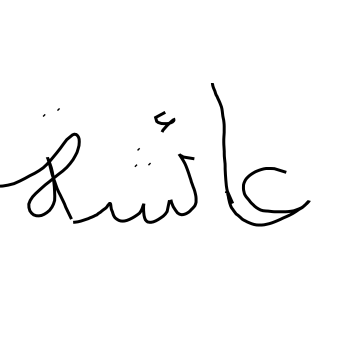

In [3]:
dataset_path = "../Calliar/"
npy_files = glob.glob(os.path.join(dataset_path, 'dataset/train/**.json'))

# Preview a single file
json_path = np.random.choice(npy_files)
drawing = json.load(open(json_path))
print(get_annotation(json_path))
data, _ = convert_3d(drawing, return_flag=True, threshold=50)
draw_strokes(data, stroke_width = 3, crop = True, square=True)

## Character-level strokes

ع


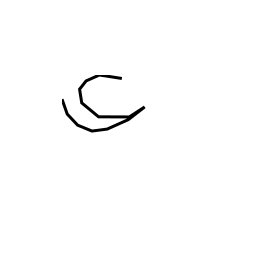

ا


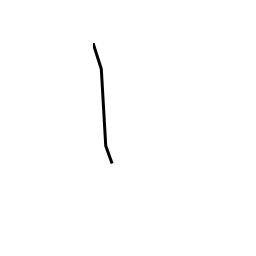

ئ


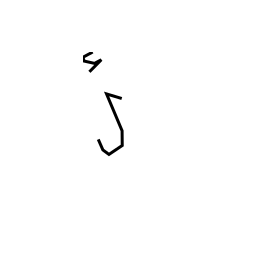

ش


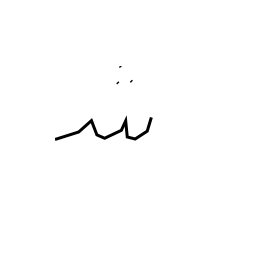

ة


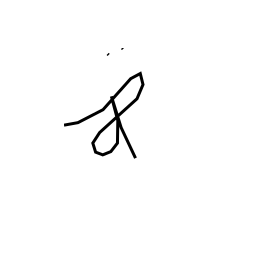

In [4]:
def draw_chars(json_path, plot=False, save_folder="../data/calliar/chars/"):
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    char_drawings = generate_characters(json_path)
    for i,d in enumerate(char_drawings):
        char, drawing = list(d.items())[0]
        save_path = json_path.split("/")[-1][:-5] + f'_{i}:{char}.png'
        if save_folder and os.path.exists(os.path.join(save_folder, save_path)):
            continue
        data, _ = convert_3d(drawing, return_flag=True, threshold=50)
        im = draw_strokes(data, stroke_width = 3, crop = True, square=True)
        if save_folder:
            im.save(os.path.join(save_folder, save_path))
        if plot:
            print(char)
            display(im)
draw_chars(json_path, plot=True)

In [ ]:
# different stroke width
# without cropping/square